In [17]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
info = pd.read_csv("E:/dasein_py/Data Analysis/招商银行/特征说明.csv", index_col =0, header =1)
df1 = pd.read_csv("E:/dasein_py/Data Analysis/招商银行/train.csv", index_col = 1, header =0)

In [95]:
df2 = pd.read_csv("E:/dasein_py/Data Analysis/招商银行/test_A榜.csv", index_col = 1, header =0)
# df1.head()
# df1.head()

In [18]:
df1.reset_index(inplace =True)

In [96]:
df2.reset_index(inplace =True)
df2.head()

,AGN_CNT_RCT_12_MON,CUST_UID,ICO_CUR_MON_ACM_TRX_TM,NB_RCT_3_MON_LGN_TMS_AGV,AGN_CUR_YEAR_AMT,AGN_CUR_YEAR_WAG_AMT,AGN_AGR_LATEST_AGN_AMT,ICO_CUR_MON_ACM_TRX_AMT,COUNTER_CUR_YEAR_CNT_AMT,PUB_TO_PRV_TRX_AMT_CUR_YEAR,...,WTHR_OPN_ONL_ICO,EMP_NBR,REG_CPT,SHH_BCK,HLD_DMS_CCY_ACT_NBR,REG_DT,LGP_HLD_CARD_LVL,OPN_TM,NB_CTC_HLD_IDV_AIO_CARD_SITU,HLD_FGN_CCY_ACT_NBR
0,23662,deca9c4409e84344bc4059116902ba0e,?,?,?,?,135692,?,2,2,...,NaN,26622,?,2,12,242461.35,?,1588.13,?,2
1,?,25377f79cf9d4964a2f9893dc572caba,2,?,?,?,?,2,2,2,...,B,1502,380000002,32,12,432,?,82.65,?,2
2,1672,66979a1614fb49f1bcdcdce75d6abefc,2,48.7,992125.6,?,992125.6,2,2,2,...,A,2,?,2,42,?,NaN,512.65,C,22
3,5432,84142dedb7e0442eb9aa7aeadf93f66e,102,88.7,46729796.3,46729796.3,7356752.4,8048976,2,2154106.4,...,B,432,5000002,12,12,442,C,432,C,2
4,11842,5e5817f15c8d4bdebefa820961854ac2,782,1545.3,27085791.9,?,135002,81516420.9,2,2421499.6,...,B,902,1131689002,32,12,3747.48,NaN,3200.06,C,2


In [19]:
df1.drop(columns ='CUST_UID', inplace = True)

In [97]:
df2.drop(columns ='CUST_UID', inplace = True)

In [20]:
quantitive = [i for i in info.index if info.loc[i,:].values[0] == '数值型' and i in df1.columns and i != 'CUST_UID']

In [21]:
[df1.replace("?", df1[quantitive[i]][df1[quantitive[i]]!='?'].median(), inplace= True) for i in range(len(quantitive))]

In [98]:
[df2.replace("?", df2[quantitive[i]][df2[quantitive[i]]!='?'].median(), inplace= True) for i in range(1,len(quantitive))]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [22]:
df1[quantitive] = df1[quantitive].apply(pd.to_numeric)

In [99]:
df2[quantitive[1:]] = df2[quantitive[1:]].apply(pd.to_numeric)

In [23]:
df1.duplicated().sum()

24

In [24]:
df1.drop_duplicates(inplace = True)

In [100]:
df2.duplicated().sum()

9

In [27]:
df1.isnull().any().sum()

4

In [28]:
# 缺失数量和百分比
null_cnt = np.sum(df1.isnull())
null_ratio = np.sum(df1.isnull())/df1.shape[0]*100
pd.DataFrame({'null_cnt': null_cnt, 'null_ratio': null_ratio})

,null_cnt,null_ratio
LABEL,0,0.000000
AGN_CNT_RCT_12_MON,0,0.000000
ICO_CUR_MON_ACM_TRX_TM,0,0.000000
NB_RCT_3_MON_LGN_TMS_AGV,0,0.000000
AGN_CUR_YEAR_AMT,0,0.000000
AGN_CUR_YEAR_WAG_AMT,0,0.000000
AGN_AGR_LATEST_AGN_AMT,0,0.000000
ICO_CUR_MON_ACM_TRX_AMT,0,0.000000
COUNTER_CUR_YEAR_CNT_AMT,0,0.000000
PUB_TO_PRV_TRX_AMT_CUR_YEAR,0,0.000000


In [29]:
quanlitive = [i for i in info.index if info.loc[i,:].values[0] == '字符型' and i in df1.columns and i != 'CUST_UID']

In [31]:
df1[quantitive] = df1[quantitive].fillna(df1[quantitive].median())

In [101]:
df2[quantitive[1:]] = df2[quantitive[1:]].fillna(df2[quantitive[1:]].median())

In [33]:
df1[quanlitive] = df1[quanlitive].fillna(df1[quanlitive].mode())

In [102]:
df2[quanlitive] = df2[quanlitive].fillna(df2[quanlitive].mode())

In [34]:
quanlitive

['MON_12_CUST_CNT_PTY_ID',
 'AI_STAR_SCO',
 'WTHR_OPN_ONL_ICO',
 'SHH_BCK',
 'LGP_HLD_CARD_LVL',
 'NB_CTC_HLD_IDV_AIO_CARD_SITU']

In [36]:
import seaborn as sns
sns.set(style='darkgrid',font_scale=1.3)
plt.rcParams['font.family']='SimHei'
plt.rcParams['axes.unicode_minus']=False
import warnings

In [38]:
len(quantitive)

44

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

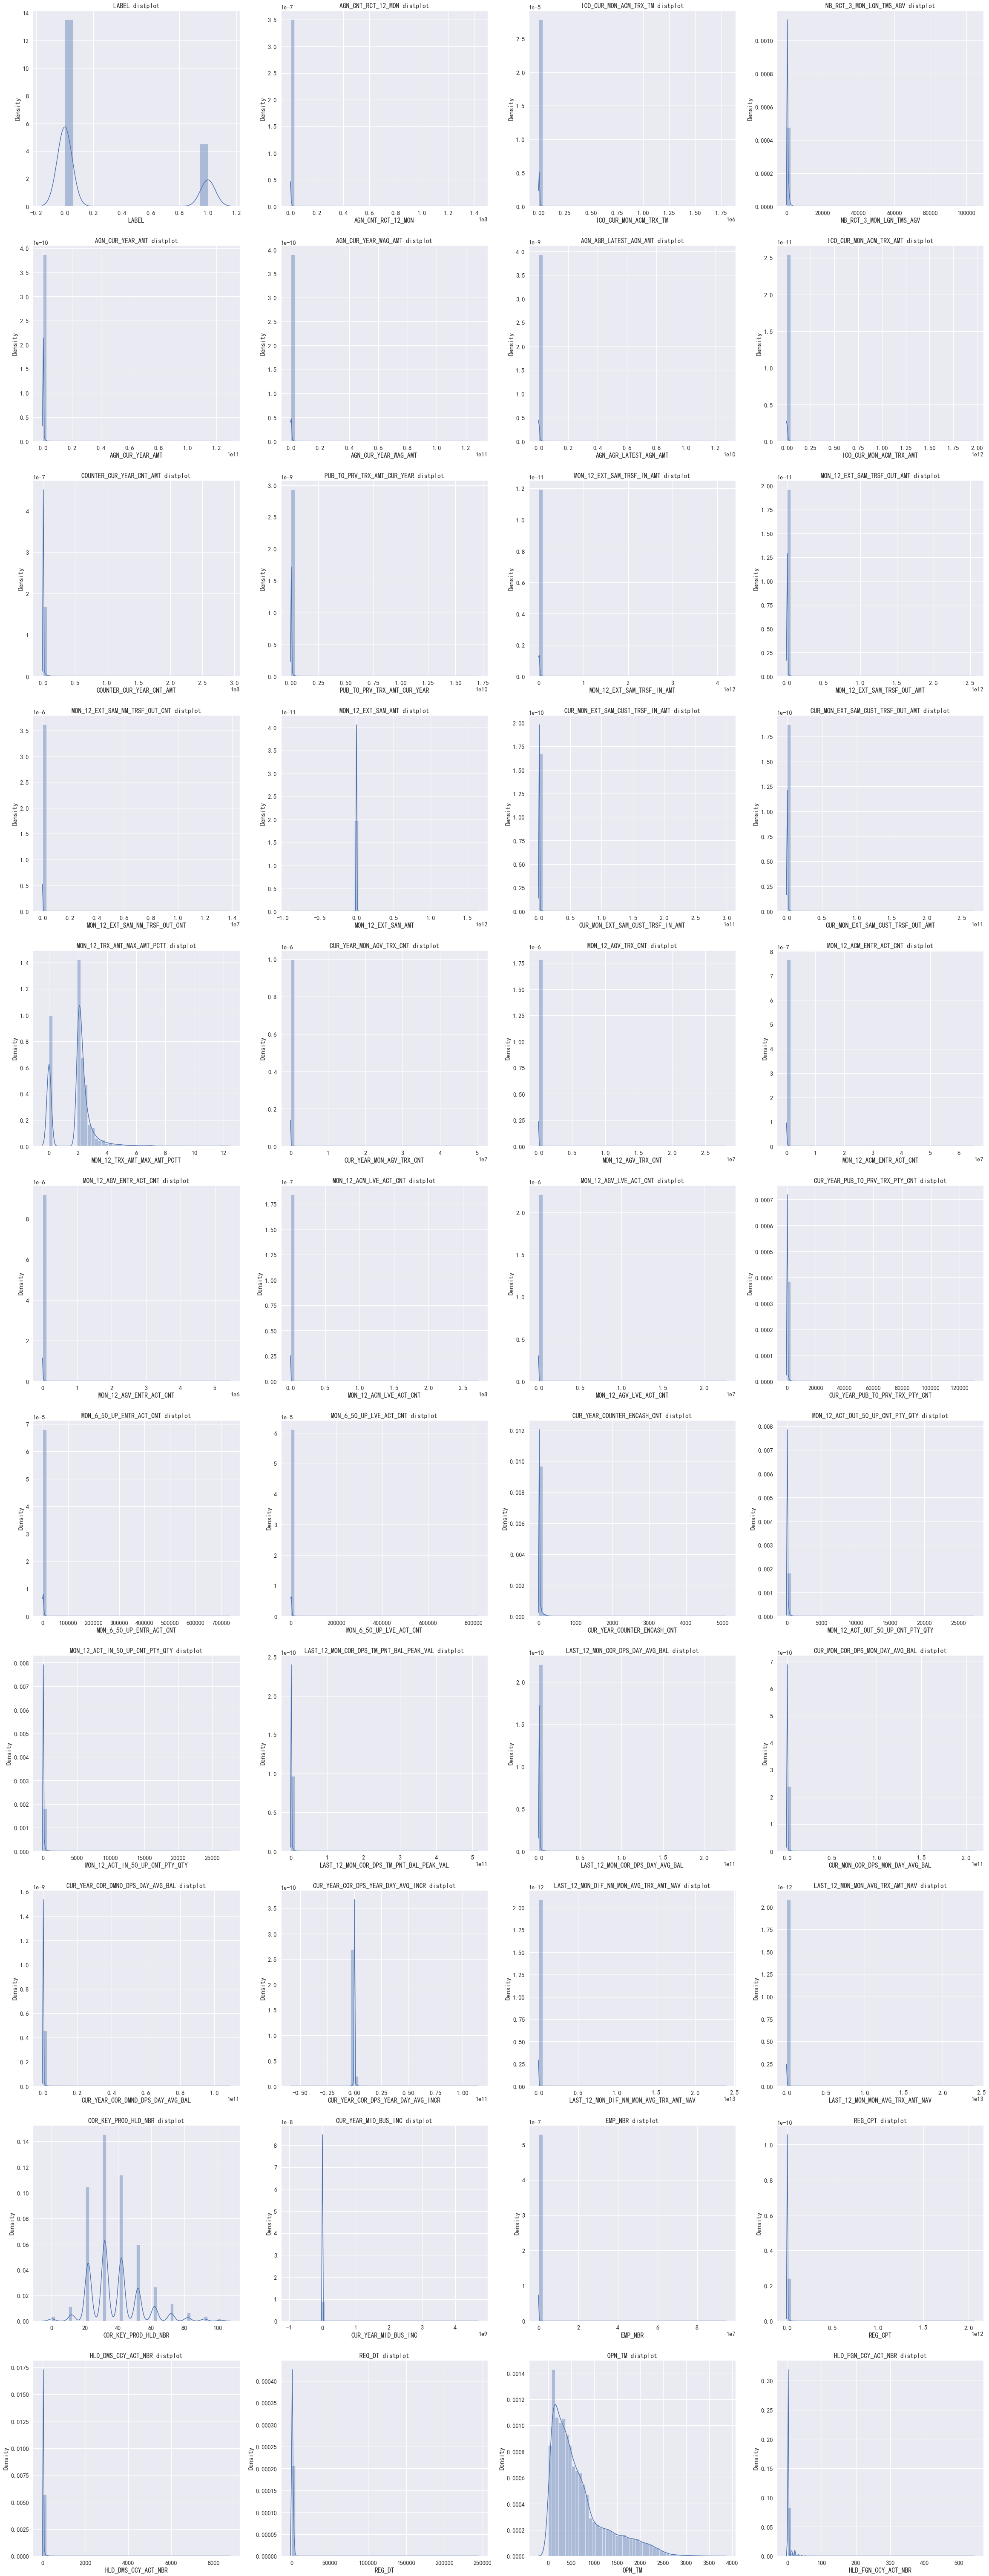

In [45]:
plt.figure(figsize=(40,110))
plt.plot(color='#00338D')
for i in range(44):

    plt.subplot(11,4,i+1)
    plt.title("{} distplot".format(quantitive[i]))
    sns.distplot(df1[quantitive[i]])
plt.show()

- 分布表获得变量：'MON_12_TRX_AMT_MAX_AMT_PCTT', 'COR_KEY_PROD_HLD_NBR', 'OPTN_TM' ,'HLD_FGN_CCY_ACT_NBR', 其余数值型变量根据变量含义做分箱。

In [49]:
label = df1.pop('LABEL')

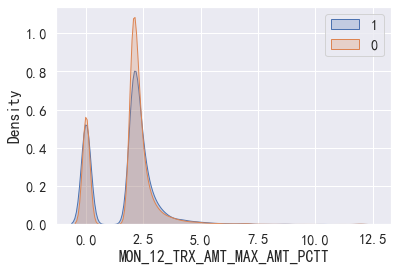

In [51]:
sns.kdeplot(df1.MON_12_TRX_AMT_MAX_AMT_PCTT[label[label==1].index], label='1', shade=True)
sns.kdeplot(df1.MON_12_TRX_AMT_MAX_AMT_PCTT[label[label==0].index], label='0', shade=True)
plt.xlabel('MON_12_TRX_AMT_MAX_AMT_PCTT')
plt.ylabel('Density')
plt.legend()
plt.show()

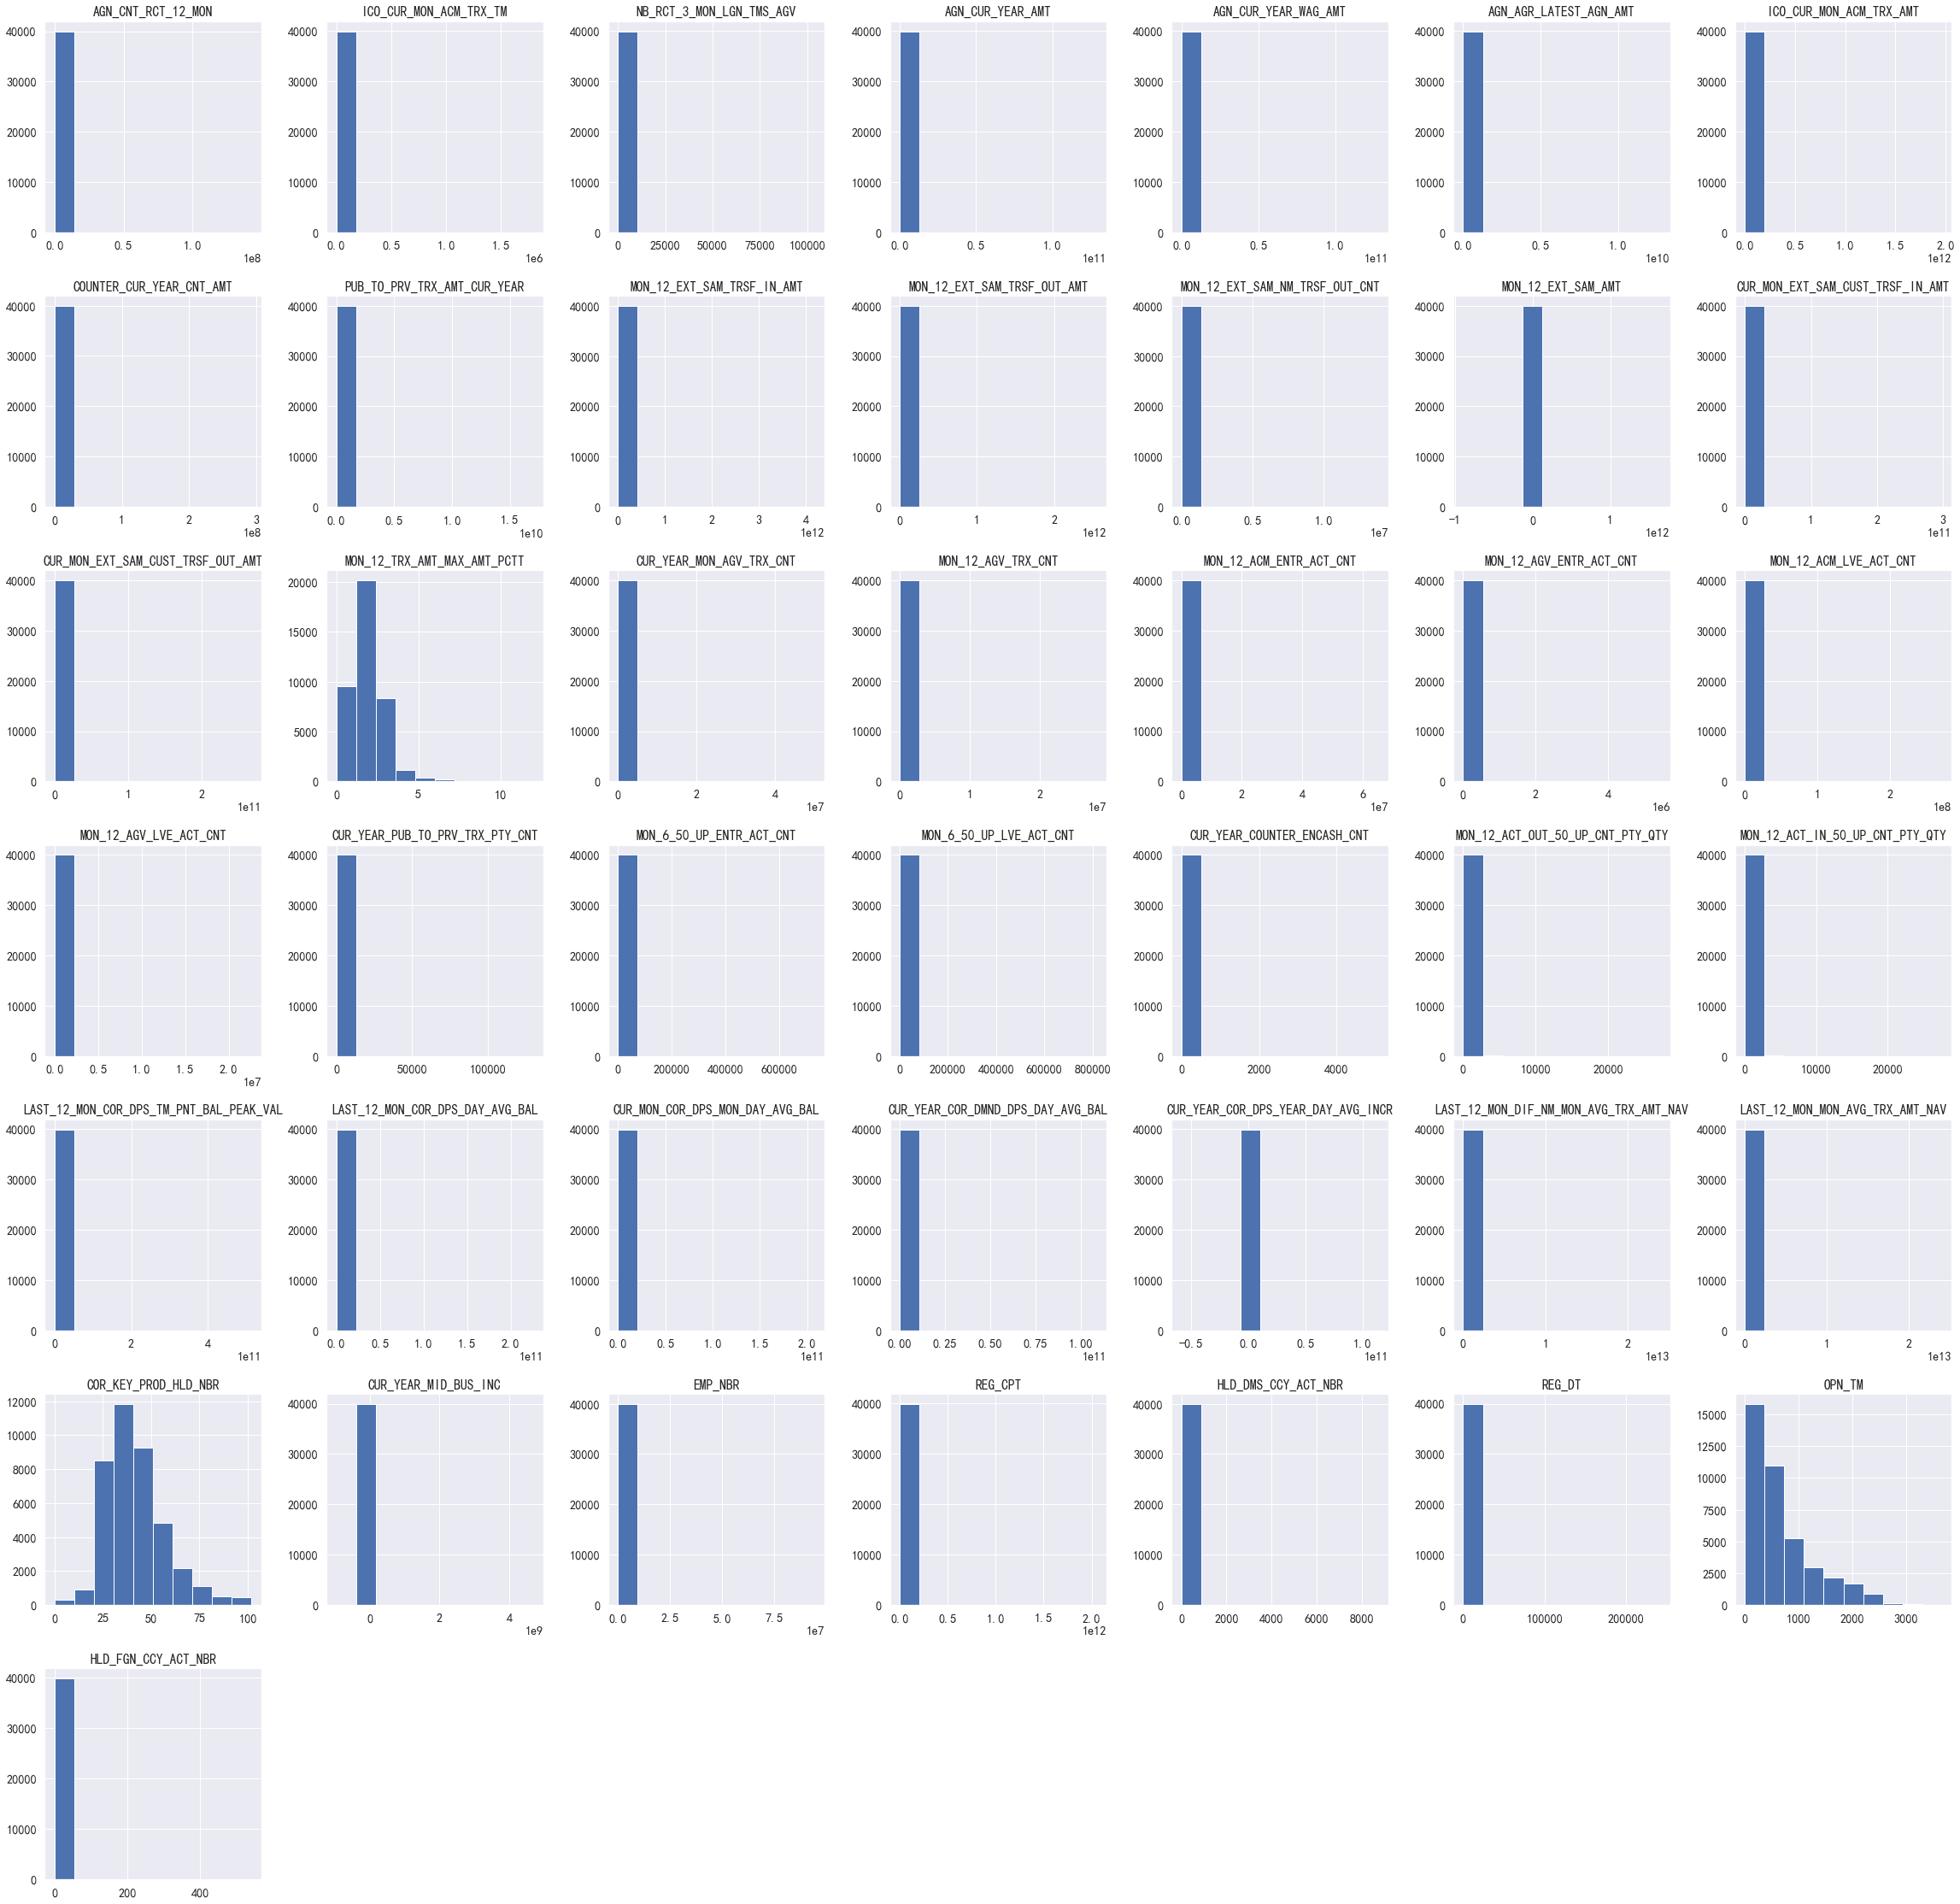

In [54]:
df1[quantitive[1:]].hist(figsize=(40,40));

In [56]:
quanlitive

['MON_12_CUST_CNT_PTY_ID',
 'AI_STAR_SCO',
 'WTHR_OPN_ONL_ICO',
 'SHH_BCK',
 'LGP_HLD_CARD_LVL',
 'NB_CTC_HLD_IDV_AIO_CARD_SITU']

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: 

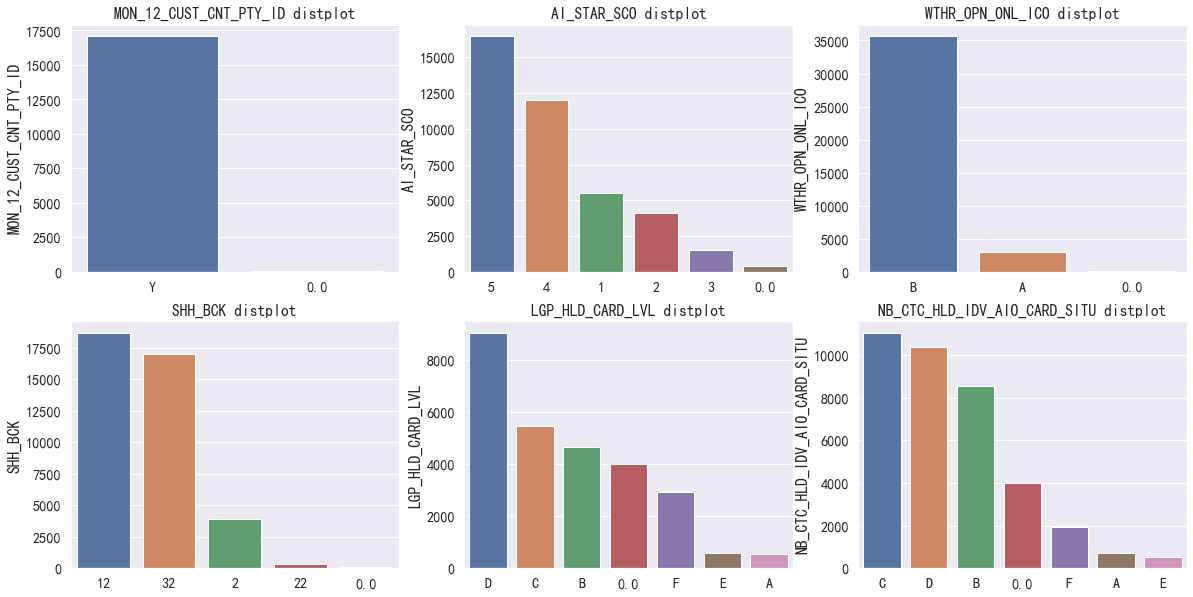

In [60]:
plt.figure(figsize=(20,10))
plt.plot(color='#00338D')
for i in range(6):

    plt.subplot(2,3,i+1)
    plt.title("{} distplot".format(quanlitive[i]))
    sns.barplot(df1[quanlitive[i]].value_counts().keys(),
               df1[quanlitive[i]].value_counts())
plt.show()

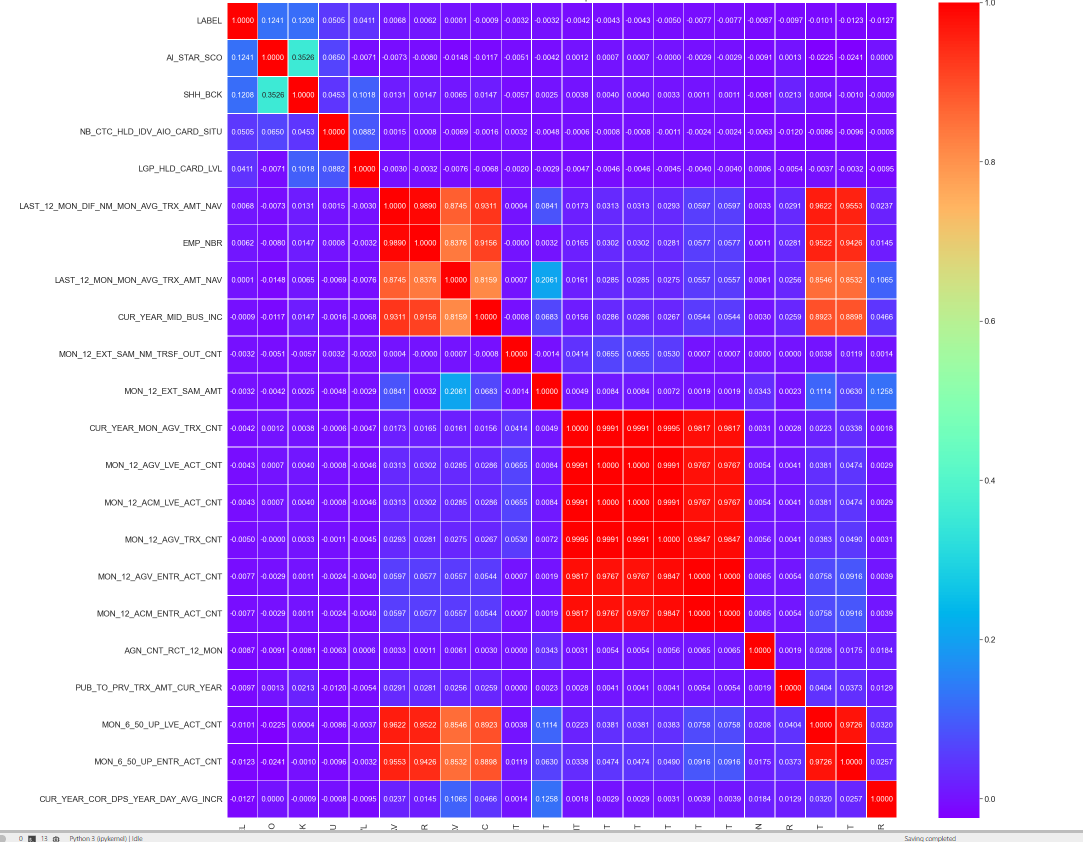
- 前三十相关性矩阵

In [62]:
#独热编码
df_onehot = pd.get_dummies(df1)
df_onehot.head()

,AGN_CNT_RCT_12_MON,ICO_CUR_MON_ACM_TRX_TM,NB_RCT_3_MON_LGN_TMS_AGV,AGN_CUR_YEAR_AMT,AGN_CUR_YEAR_WAG_AMT,AGN_AGR_LATEST_AGN_AMT,ICO_CUR_MON_ACM_TRX_AMT,COUNTER_CUR_YEAR_CNT_AMT,PUB_TO_PRV_TRX_AMT_CUR_YEAR,MON_12_EXT_SAM_TRSF_IN_AMT,...,LGP_HLD_CARD_LVL_D,LGP_HLD_CARD_LVL_E,LGP_HLD_CARD_LVL_F,NB_CTC_HLD_IDV_AIO_CARD_SITU_0.0,NB_CTC_HLD_IDV_AIO_CARD_SITU_A,NB_CTC_HLD_IDV_AIO_CARD_SITU_B,NB_CTC_HLD_IDV_AIO_CARD_SITU_C,NB_CTC_HLD_IDV_AIO_CARD_SITU_D,NB_CTC_HLD_IDV_AIO_CARD_SITU_E,NB_CTC_HLD_IDV_AIO_CARD_SITU_F
0,0.0,72.0,425.3,0.0,0.0,0.0,25879985.3,2.0,660732.0,262372474.2,...,0,0,0,1,0,0,0,0,0,0
1,2282.0,222.0,0.0,11776572.4,0.0,1964626.4,14755499.8,2.0,126608.3,2.0,...,0,0,1,0,0,0,0,1,0,0
2,0.0,2.0,0.0,0.0,0.0,4599822.3,2.0,2.0,2.0,2.0,...,0,0,1,0,0,0,0,0,0,0
3,0.0,0.0,22.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,...,0,0,0,0,0,0,1,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0


In [63]:
from sklearn.preprocessing import StandardScaler

In [65]:
df1[quanlitive] = df1[quanlitive].apply(lambda x:pd.factorize(x)[0]) #转换成因子

In [104]:
df2[quanlitive] = df2[quanlitive].apply(lambda x:pd.factorize(x)[0]) #转换成因子

In [105]:
scaler = StandardScaler(copy=False)

In [106]:
df2 = scaler.fit_transform(df2)

In [65]:
df1 = scaler.fit_transform(df1)

In [66]:
from scipy import stats
#标准化
from sklearn.preprocessing import StandardScaler
import sklearn #特征工程
from sklearn import preprocessing  #数据预处理
from sklearn.preprocessing import LabelEncoder #编码转换
from sklearn.model_selection import StratifiedShuffleSplit #分层抽样
from sklearn.model_selection import train_test_split #数据集训练集划分
# 训练分类模型
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier #随机森林
from sklearn.svm import SVC#支持向量机
from sklearn.linear_model import LogisticRegression #逻辑回归
from sklearn.neighbors import KNeighborsClassifier #k邻近算法
from sklearn.naive_bayes import GaussianNB #朴素贝叶斯
from sklearn.tree import DecisionTreeClassifier #决策树
from sklearn.ensemble import AdaBoostClassifier #分类器算法
from sklearn.ensemble import GradientBoostingClassifier #梯度提升
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import RidgeClassifier # 岭
from sklearn.neural_network import MLPClassifier #神经网络
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
import time

In [68]:
x_train,x_test,y_train,y_test=train_test_split(df1,label,test_size=.2,random_state=22)
y_test

5977     0
22002    1
16280    0
28876    0
387      0
        ..
4415     0
23881    0
11297    0
29434    0
9949     0
Name: LABEL, Length: 7996, dtype: int64

In [69]:
Classifiers = [["Random Forest",RandomForestClassifier()],
             # ["Support Vector Machine",SVC()],
             ["LogisticRegression",LogisticRegression()],
             ["KNeighbor",KNeighborsClassifier(n_neighbors=5)],
             ["Naive Bayes",GaussianNB()],
             ["Decision Tree",DecisionTreeClassifier()],
             ["GradientBoostingClassifier",GradientBoostingClassifier()],
             ["XGB",XGBClassifier()],
             ["CatBoost",CatBoostClassifier(logging_level='Silent')],
              # ['RidgeClassifier',RidgeClassifier()],
               ['MLPClassifier',MLPClassifier(solver='lbfgs',activation = 'relu',
                    max_iter = 50,alpha = 0.001,
                    hidden_layer_sizes = (10,30),
                    random_state = 1,verbose = True)],
               # ['SGDClassifier',SGDClassifier()],
               # ['XGBClassifier',XGBClassifier()],
               ['BaggingClassifier',BaggingClassifier()],
               ['XGBClassifier',XGBClassifier()]
              ]
warnings.filterwarnings('ignore')

In [70]:
Classify_result=[]
names=[]
prediction=[]
for name,classifier in Classifiers:
    classifier=classifier
    t1 = time.time()
    classifier.fit(x_train,y_train.astype('int'))
    y_pred=classifier.predict_proba(x_test)
    y_pred = y_pred[:,1] # 取第二列 正的概率，根据每个人的数据不同而不同!
    y_pred = np.around(y_pred,0).astype(int) # .around()是四舍五入的函数 第二个参数0表示保留0位小数，
    t2=time.time()
    precision=precision_score(y_test,y_pred.astype('int'))
    # acur = accuracy_score(y_test, y_pred)
    # proba = classifier.predict_proba(x_test)
    f1score = f1_score(y_test, y_pred)
    time_diff = t2 -t1
    class_eva=pd.DataFrame([precision,f1score, time_diff])
    Classify_result.append(class_eva)
    name=pd.Series(name)
    names.append(name)
    y_pred=pd.Series(y_pred)
    prediction.append(y_pred)
names = pd.DataFrame(names)
names=names[0].tolist()
result = pd.concat(Classify_result,axis=1)
result.columns =names
result.index = ["precision",'f1score', "time_diff"]
print(result.T)

[16:09:29] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:10:07] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
                            precision   f1score  time_diff
Random Forest                0.805894  0.792604   9.060920
LogisticRegression           0.660377  0.033541   0.413545
KNeighbor                    0.384897  0.309005   6.273541
Naive Bayes                  0.274802  0.428370   0.046843
Decision Tree                0.702264  0.701918   1.517687
GradientBoostingClassifier   0.803303  0.796131  23.703510
XGB                          0.799299  0.792163   5.887448
CatBoost                

In [72]:
from sklearn.model_selection import GridSearchCV
other_params = {'learning_rate': 0.1, 'n_estimators': 100, 'max_depth': 5, 'min_child_weight': 1, 'seed': 0,
                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

param_test1 = {
 'max_depth':list(range(4,9,2)),
 'min_child_weight':list(range(1,6,2))
}

xgb1 = XGBClassifier(**other_params)
gs1 = GridSearchCV(xgb1,param_test1,cv = 5,scoring = 'roc_auc',n_jobs = -1,verbose=2)
best_model1=gs1.fit(df1,label)
print('最优参数：',best_model1.best_params_)
print('最佳模型得分：',best_model1.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[16:20:06] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
最优参数： {'max_depth': 6, 'min_child_weight': 5}
最佳模型得分： 0.9497175157901229


In [75]:
# 优化gamma参数
other_params = {'learning_rate': 0.1, 'n_estimators': 100, 'max_depth': 6, 'min_child_weight': 5, 'seed': 0,
                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

param_test = {
'gaama':[0,0.05,0.1,0.2,0.3]
}

xgb = XGBClassifier(**other_params)
gs = GridSearchCV(xgb,param_test,cv = 5,scoring = 'roc_auc',n_jobs = -1,verbose=2)
best_model=gs.fit(df1,label)
print('最优参数：',best_model.best_params_)
print('最佳模型得分：',best_model.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[16:31:50] WARNING: ..\src\learner.cc:576: 
Parameters: { "gaama" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:31:50] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
最优参数： {'gaama': 0}
最佳模型得分： 0.9497175157901229


In [77]:
# 优化subsample和colsample_bytree
other_params = {'learning_rate': 0.1, 'n_estimators': 100, 'max_depth': 6, 'min_child_weight': 5, 'seed': 0,
                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}
param_test = {
'subsample':[0.6,0.7,0.8,0.9],
'colsample_bytree':[0.6,0.7,0.8,0.9]
}

xgb = XGBClassifier(**other_params)
gs = GridSearchCV(xgb,param_test,cv = 5,scoring = 'roc_auc',n_jobs = -1,verbose=2)
best_model=gs.fit(df1,label)
print('最优参数：',best_model.best_params_)
print('最佳模型得分：',best_model.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[16:38:45] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
最优参数： {'colsample_bytree': 0.8, 'subsample': 0.9}
最佳模型得分： 0.9499186720425803


In [78]:
# reg_alpha和reg_lambda

other_params = {'learning_rate': 0.1, 'n_estimators': 100, 'max_depth': 6, 'min_child_weight': 5, 'seed': 0,
                    'subsample': 0.9, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}
param_test = {
'reg_alpha': [4,5,6,7], 
'reg_lambda': [0,0.01,0.05, 0.1, ]
}

xgb = XGBClassifier(**other_params)
gs = GridSearchCV(xgb,param_test,cv = 5,scoring = 'roc_auc',n_jobs = -1,verbose=2)
best_model=gs.fit(df1,label)
print('最优参数：',best_model.best_params_)
print('最佳模型得分：',best_model.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[16:46:38] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
最优参数： {'reg_alpha': 5, 'reg_lambda': 0.1}
最佳模型得分： 0.9501387298748888


In [79]:
# 继续 reg_lambda

other_params = {'learning_rate': 0.1, 'n_estimators': 100, 'max_depth': 6, 'min_child_weight': 5, 'seed': 0,
                    'subsample': 0.9, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 5, 'reg_lambda': 0.1}
param_test = {
'reg_lambda': [0.05, 0.1,0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
}

xgb = XGBClassifier(**other_params)
gs = GridSearchCV(xgb,param_test,cv = 5,scoring = 'roc_auc',n_jobs = -1,verbose=2)
best_model=gs.fit(df1,label)
print('最优参数：',best_model.best_params_)
print('最佳模型得分：',best_model.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[16:51:38] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
最优参数： {'reg_lambda': 0.1}
最佳模型得分： 0.9501387298748888


In [80]:
# learning_rate和n_estimators
other_params = {'learning_rate': 0.1, 'n_estimators': 100, 'max_depth': 6, 'min_child_weight': 5, 'seed': 0,
                    'subsample': 0.9, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 5 , 'reg_lambda': 0.1}
param_test = {
'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.07, 0.1, 0.15, 0.2], 
'n_estimators': [100,200,300,400,500]
}

xgb = XGBClassifier(**other_params)
gs = GridSearchCV(xgb,param_test,cv = 5,scoring = 'roc_auc',n_jobs = -1,verbose=2)
best_model=gs.fit(df1,label)
print('最优参数：',best_model.best_params_)
print('最佳模型得分：',best_model.best_score_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[17:32:42] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
最优参数： {'learning_rate': 0.05, 'n_estimators': 300}
最佳模型得分： 0.9504219883624405


In [81]:
clf = XGBClassifier(learning_rate= 0.05, n_estimators= 300, max_depth= 6, min_child_weight= 5, seed= 0,
                    subsample= 0.9, colsample_bytree= 0.8, gamma= 0, reg_alpha= 5, reg_lambda=0.1, n_jobs = -1)
clf.fit(df1,label)
clf.score(df1,label)

[17:44:10] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9296077646587952

In [82]:
# AUC
from sklearn.metrics import roc_curve, auc
predict_proba = clf.predict_proba(df1)
false_positive_rate, true_positive_rate, thresholds = roc_curve(label, predict_proba[:,1])
auc(false_positive_rate, true_positive_rate)

0.9743255659575887

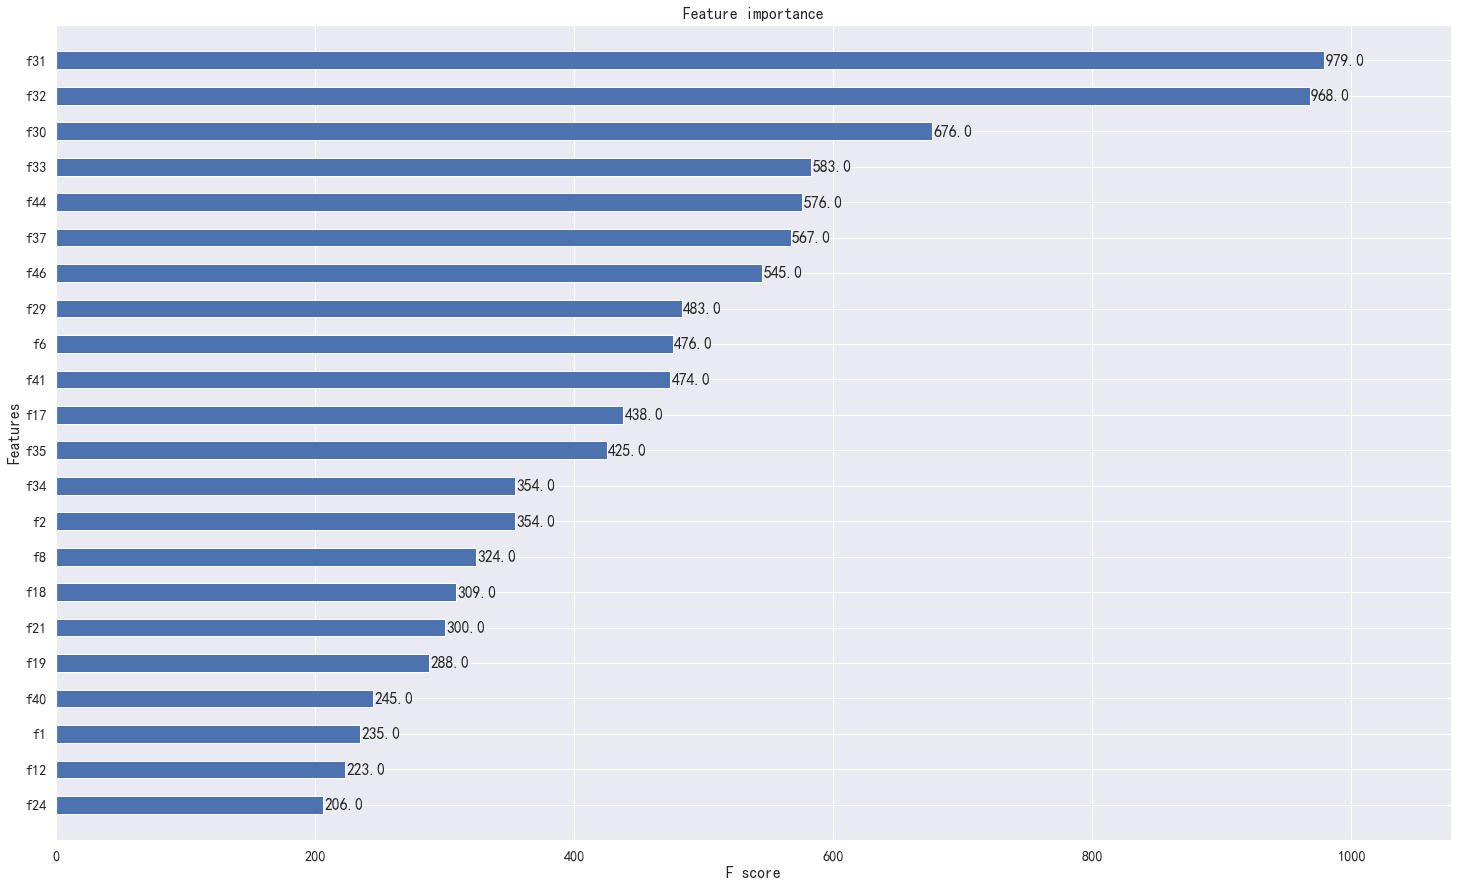

In [90]:
from xgboost import plot_importance
fig,ax = plt.subplots(figsize=(25,15))
plot_importance(clf, 
                ax = ax,
               height = 0.5,
               grid = True,
               show_values = True,
               max_num_features = 22)
plt.show()

In [107]:
pre = clf.predict_proba(df2)[:,1]
pd.Series(pre, name='LABEL').reset_index().to_csv('submit.csv', index=False)